In [20]:
#About this file:
#Generates fake height CME data to test the velocity functions
#After creating this fake height data, we then add noise to it to see whether or not the noise creates
#a sinusoidal curve
#The fake height data is created in a value called 'h' defined in the block below
#The fake height data with noise is created in 'noise_h'
#The velocity function we are testing is created in 'v'
#The velocity that we get from the derivative of 'h' should match 'v'

%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sys
sys.path.insert(0, 'C:/Users/Betsy/Documents/TCD/cmevo/functions')
import cme_graphing

In [24]:
#based off Dec 19, 1996 data
Rsun_m = 6.95700e8
delta_time = 50.0 * 60.0 # 50 minutes apart for recordings, times 60 to get seconds 50
h_0 = 2.76 * Rsun_m #height is 2.76 solar radius, in km. Grabbed from 1996
v_0 = 100  *1000 #velocity is 100 km/s
a_0 = 2 # m/s^2

time = np.arange(0.0, 1400.0*60, delta_time)
h = cme_graphing.height(time, h_0, v_0, a_0)
noise_h = h + (h * np.random.normal(scale=0.05, size=len(h))) #data with noise
print ("Model height function: a=%f m/s v=%f km/s h=%f Rsun" %(a_0, v_0/1000, h_0/Rsun_m))

popt, pcov = curve_fit(cme_graphing.height, time, noise_h)
print ("Height-Time fit for plt curve function: a=%f m/s v=%f km/s h=%f Rsun" %(popt[0], popt[1]/1000, popt[2]/Rsun_m))

Model height function: a=2.000000 m/s v=100.000000 km/s h=2.760000 Rsun
Height-Time fit for plt curve function: a=1.000000 m/s v=189.382293 km/s h=0.000000 Rsun


C:\Users\Betsy\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


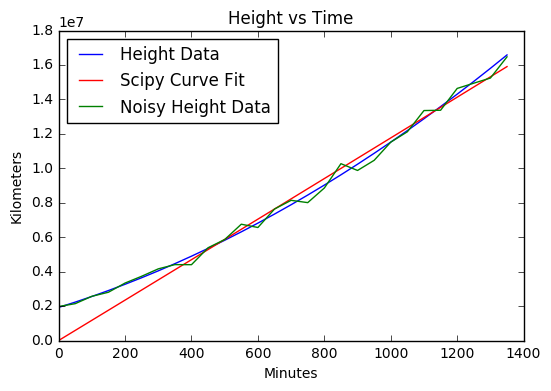

In [22]:
plt.title("Height vs Time")
plt.xlabel('Minutes')
plt.ylabel('Kilometers')
plt.plot(time/60, h/1000, label='Height Data')
plt.plot(time/60, cme_graphing.height(time, *popt)/1000, 'r-', label='Scipy Curve Fit')
plt.plot(time/60, noise_h/1000, label='Noisy Height Data')
plt.legend(loc=2)

For the model equation, a=2.000000 m/s, v=100.000000 km/s
Least-squares linear fit (noisy height) : v=182.315221 m/s, h=1.151555 R_Sun
Least-squares quadratic fit (noisy height): a=2.118836 m/s^2, v=96.502356 km/s, h=2.755073 R_Sun
Least-squares linear fit (noisy velocity): a=2.551451 m/s^2, v=82.616253 km/s
Curve fit: a=2.551451 m/s^2, v=82.616253 km/s 


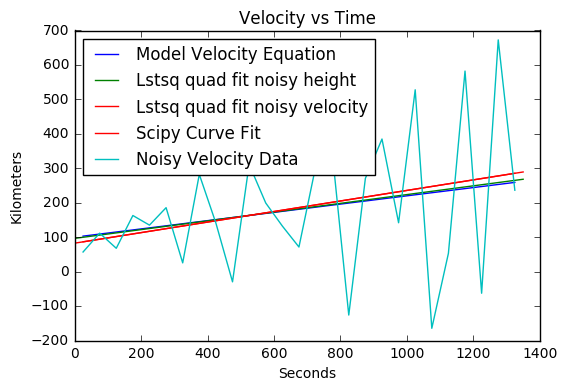

In [25]:
center_time=(cme_graphing.format_time(time))

#Velocity 1: Model equation
v = cme_graphing.velocity(center_time, v_0, a_0) #velocity function (in m/s) (also fitting function)
v_noise = np.random.normal(scale=0.05, size=len(v))
v_data = v + v_noise
print ("For the model equation, a=%f m/s, v=%f km/s" % (a_0, v_0/1000))

#Velocity 2: Linear Algebra Least-squares method
A = np.vstack([time, np.ones(len(time))]).T
lin = np.linalg.lstsq(A, noise_h)[0] #grabs values for velocity
print('Least-squares linear fit (noisy height) : v=%f m/s, h=%f R_Sun' % (lin[0]/1000, lin[1]/Rsun_m))

A = np.vstack([time**2, time, np.ones(len(time))]).T
quad = np.linalg.lstsq(A, noise_h)[0] #grabs values for acceleration and velocity
fit_noisy_h = quad[1] + (time * quad[0]*2) #quad1=velocity, quad0=acceleration
print('Least-squares quadratic fit (noisy height): a=%f m/s^2, v=%f km/s, h=%f R_Sun' % ((quad[0]*2), quad[1]/1000, quad[2]/Rsun_m))

#Velocity 3: GOOD
noisy_v=cme_graphing.get_derivative(noise_h, time)
A = np.vstack([center_time, np.ones(len(center_time))]).T
lin = np.linalg.lstsq(A, noisy_v)[0]
fit_noisy_v = lin[1] + (center_time * lin[0])
print('Least-squares linear fit (noisy velocity): a=%f m/s^2, v=%f km/s' % (lin[0], lin[1]/1000))

#Velocity 4: Plt curve fit function
popt, pcov = curve_fit(cme_graphing.velocity, time[:-1]+(time[1:]-time[0:-1])*0.5, noisy_v)
print ("Curve fit: a=%f m/s^2, v=%f km/s " % (popt[1], popt[0]/1000) )

#Plotting
plt.title("Velocity vs Time")
plt.xlabel('Minutes')
plt.ylabel('Kilometers')
plt.plot(center_time/60, v/1000, label='Model Velocity Equation')
plt.plot(time/60, fit_noisy_h/1000, label='Lstsq quad fit noisy height')
plt.plot(center_time/60, fit_noisy_v/1000, label='Lstsq quad fit noisy velocity')
plt.plot(time/60, cme_graphing.velocity(time, *popt)/1000, 'r-', label='Scipy Curve Fit')
plt.plot(center_time/60, noisy_v/1000, label='Noisy Velocity Data')
plt.legend(loc=2)
